# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data 
        CW_response = requests.get(city_url)
        CW_json = CW_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = CW_json["coord"]["lat"]
        city_lng = CW_json["coord"]["lon"]
        city_max_temp = CW_json["main"]["temp_max"]
        city_humidity = CW_json["main"]["humidity"]
        city_clouds = CW_json["clouds"]["all"]
        city_wind = CW_json["wind"]["speed"]
        city_country = CW_json["sys"]["country"]
        city_date = CW_json["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dingle
Processing Record 2 of Set 1 | ancud
Processing Record 3 of Set 1 | lebedinyy
Processing Record 4 of Set 1 | san andres
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 7 of Set 1 | kavieng
Processing Record 8 of Set 1 | piacabucu
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | naze
Processing Record 12 of Set 1 | ilo
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | udachnyy
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | tautira
Processing Record 17 of Set 1 | kangaatsiaq
Processing Record 18 of Set 1 | victoria
Processing Record 19 of Set 1 | hovd
Processing Record 20 of Set 1 | songjianghe
Processing Record 21 of Set 1 | marcona
City not found. Skipping...
Processing Record 22 of Set 1 | dikson
Pr

City not found. Skipping...
Processing Record 36 of Set 4 | ruatoria
City not found. Skipping...
Processing Record 37 of Set 4 | atar
Processing Record 38 of Set 4 | tuatapere
Processing Record 39 of Set 4 | rach gia
Processing Record 40 of Set 4 | mugumu
Processing Record 41 of Set 4 | baykit
Processing Record 42 of Set 4 | tasiilaq
Processing Record 43 of Set 4 | puerto carreno
Processing Record 44 of Set 4 | saldanha
Processing Record 45 of Set 4 | bolobo
Processing Record 46 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 47 of Set 4 | fukue
Processing Record 48 of Set 4 | nizhniy odes
Processing Record 49 of Set 4 | sept-iles
Processing Record 0 of Set 5 | salalah
Processing Record 1 of Set 5 | viligili
City not found. Skipping...
Processing Record 2 of Set 5 | wilhelmshaven
Processing Record 3 of Set 5 | thoen
Processing Record 4 of Set 5 | aflu
City not found. Skipping...
Processing Record 5 of Set 5 | pulsano
Processing Record 6 of Set 5 | henties bay
Processi

Processing Record 28 of Set 8 | mwense
Processing Record 29 of Set 8 | nehe
Processing Record 30 of Set 8 | anadyr
Processing Record 31 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 32 of Set 8 | itoman
Processing Record 33 of Set 8 | neyshabur
Processing Record 34 of Set 8 | jardim
Processing Record 35 of Set 8 | santa isabel do rio negro
Processing Record 36 of Set 8 | clyde river
Processing Record 37 of Set 8 | dogondoutchi
Processing Record 38 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 39 of Set 8 | nago
Processing Record 40 of Set 8 | petauke
Processing Record 41 of Set 8 | tabou
Processing Record 42 of Set 8 | paita
Processing Record 43 of Set 8 | ust-ilimsk
Processing Record 44 of Set 8 | youkounkoun
Processing Record 45 of Set 8 | yulara
Processing Record 46 of Set 8 | dunedin
Processing Record 47 of Set 8 | port hardy
Processing Record 48 of Set 8 | rongcheng
Processing Record 49 of Set 8 | phanat nikhom
Processing Record 0 of Set 

Processing Record 15 of Set 12 | corrales
Processing Record 16 of Set 12 | lincoln
Processing Record 17 of Set 12 | ghanzi
Processing Record 18 of Set 12 | tsumeb
Processing Record 19 of Set 12 | baruun-urt
Processing Record 20 of Set 12 | rio de jesus
Processing Record 21 of Set 12 | pemba
Processing Record 22 of Set 12 | valdivia
Processing Record 23 of Set 12 | partizanskoye
Processing Record 24 of Set 12 | teguldet
Processing Record 25 of Set 12 | camacha
Processing Record 26 of Set 12 | tucupita
Processing Record 27 of Set 12 | lima
Processing Record 28 of Set 12 | manokwari
Processing Record 29 of Set 12 | higuey
City not found. Skipping...
Processing Record 30 of Set 12 | sala consilina
Processing Record 31 of Set 12 | benemerito de las americas
Processing Record 32 of Set 12 | kropotkin
Processing Record 33 of Set 12 | pisco
Processing Record 34 of Set 12 | hamilton
Processing Record 35 of Set 12 | lozova
Processing Record 36 of Set 12 | potosi
Processing Record 37 of Set 12 | 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dingle,10.9995,122.6711,22.87,93,54,3.43,PH,1676223433
1,ancud,-41.8697,-73.8203,15.40,59,100,3.76,CL,1676223228
2,lebedinyy,58.5167,125.5167,-16.70,97,100,7.05,RU,1676223433
3,san andres,12.5847,-81.7006,29.01,70,40,7.20,CO,1676223433
4,albany,42.6001,-73.9662,7.91,44,99,0.07,US,1676223236


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dingle,10.9995,122.6711,22.87,93,54,3.43,PH,1676223433
1,ancud,-41.8697,-73.8203,15.40,59,100,3.76,CL,1676223228
2,lebedinyy,58.5167,125.5167,-16.70,97,100,7.05,RU,1676223433
3,san andres,12.5847,-81.7006,29.01,70,40,7.20,CO,1676223433
4,albany,42.6001,-73.9662,7.91,44,99,0.07,US,1676223236


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

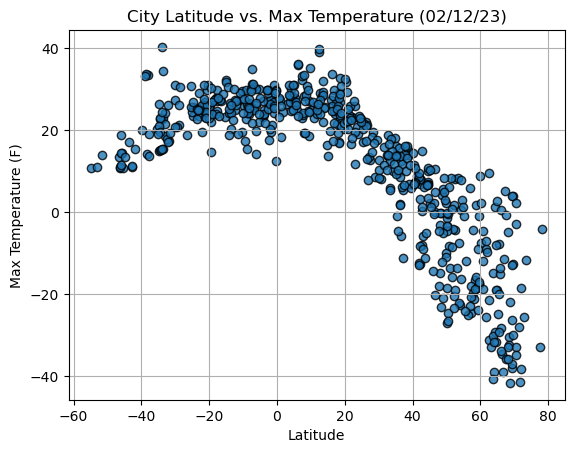

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

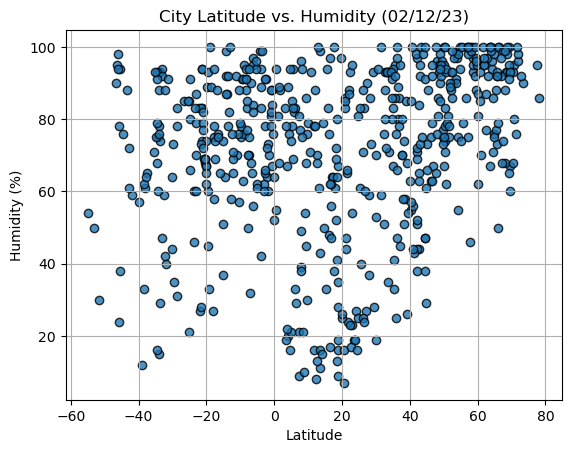

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

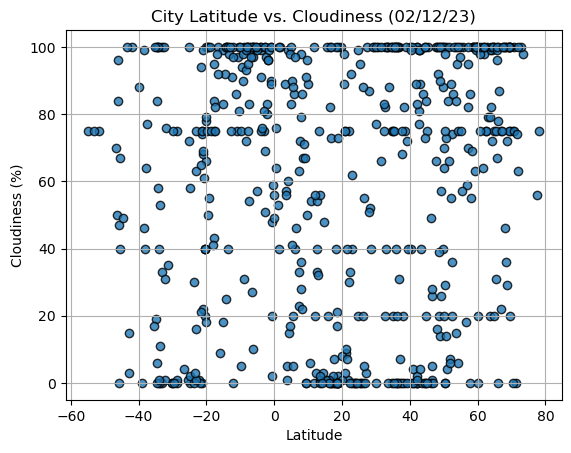

In [14]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

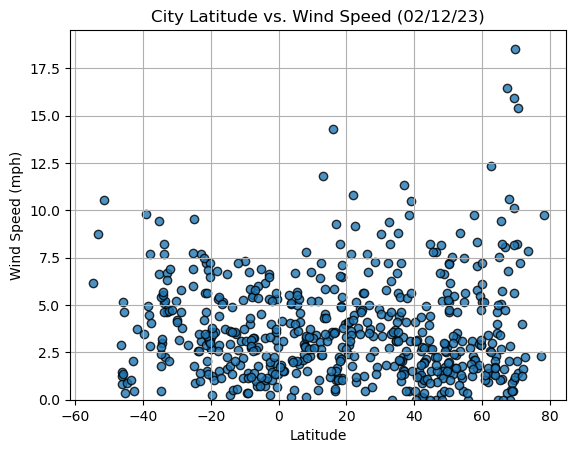

In [20]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", marker="o", alpha=0.8)

# Set title and labels
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Set y-axis limit
plt.ylim(0, max(city_data_df["Wind Speed"])+1)

# Incorporate the other graph properties
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line y-values
    regress_values = x_values * slope + intercept
    
    # Create the line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create the scatter plot with regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    
    # Add the line equation to the plot
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    
    # Add title, x and y labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Print r-value
    print(f"The r-value is: {rvalue}")
    
    # Show plot
    plt.show()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dingle,10.9995,122.6711,22.87,93,54,3.43,PH,1676223433
2,lebedinyy,58.5167,125.5167,-16.70,97,100,7.05,RU,1676223433
3,san andres,12.5847,-81.7006,29.01,70,40,7.20,CO,1676223433
4,albany,42.6001,-73.9662,7.91,44,99,0.07,US,1676223236
7,kapaa,22.0752,-159.3190,23.18,88,75,10.80,US,1676223254


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ancud,-41.8697,-73.8203,15.40,59,100,3.76,CL,1676223228
5,kavieng,-2.5744,150.7967,26.78,78,100,1.80,PG,1676223434
6,piacabucu,-10.4056,-36.4344,29.55,57,81,5.28,BR,1676223434
10,ilo,-17.6394,-71.3375,24.55,75,84,2.90,PE,1676223436
11,ushuaia,-54.8000,-68.3000,10.81,54,75,6.17,AR,1676223403


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.878327402880549


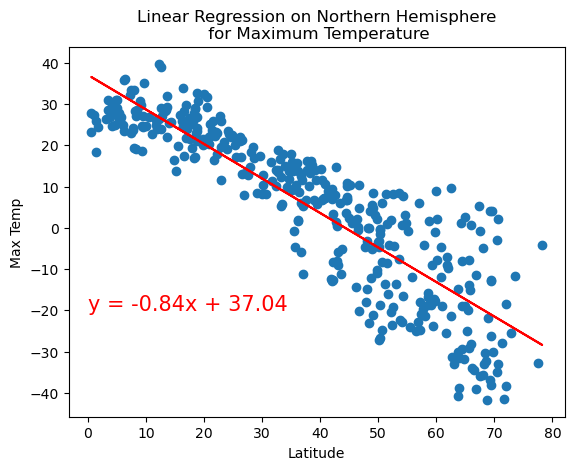

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function to create the linear regression line and plot
plot_linear_regression(x_values, y_values, 'Linear Regression on Northern Hemisphere\n for Maximum Temperature', 
                        'Latitude', 'Max Temp', (0,-20))

The r-value is: 0.48902483583272516


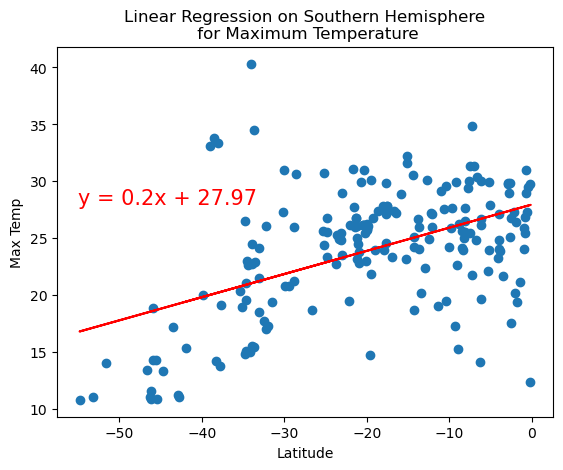

In [37]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function to create the linear regression line and plot
plot_linear_regression(x_values, y_values, 'Linear Regression on Southern Hemisphere\n for Maximum Temperature', 
                        'Latitude', 'Max Temp', (-55,28))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4743865636814657


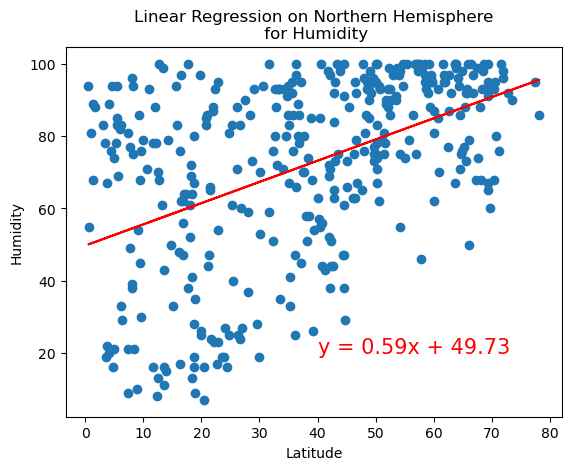

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function to create the linear regression line and plot
plot_linear_regression(x_values, y_values, 'Linear Regression on Northern Hemisphere\n for Humidity', 
                        'Latitude', 'Humidity', (40,20))

The r-value is: 0.23046680657839916


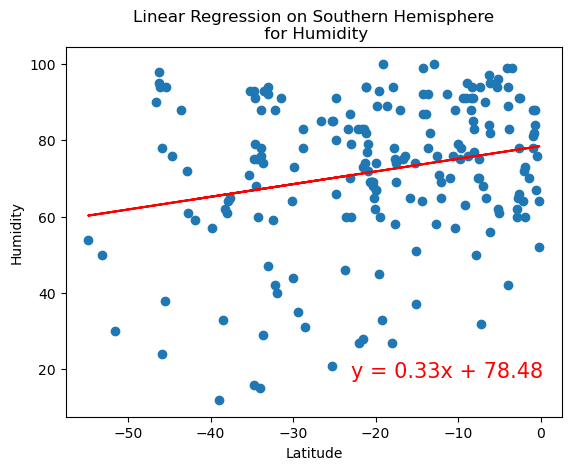

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function to create the linear regression line and plot
plot_linear_regression(x_values, y_values, 'Linear Regression on Southern Hemisphere\n for Humidity', 
                        'Latitude', 'Humidity', (-23,18))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2723565500348665


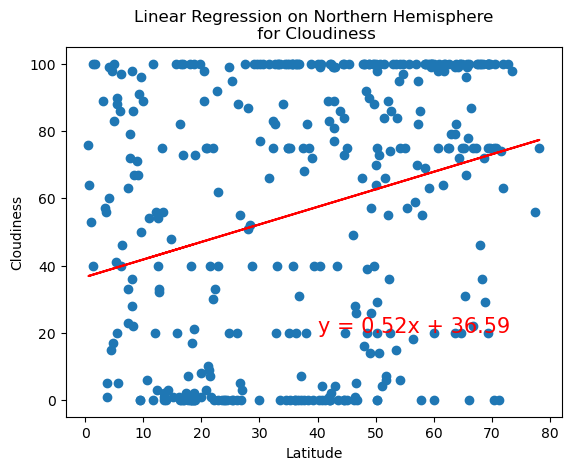

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function to create the linear regression line and plot
plot_linear_regression(x_values, y_values, 'Linear Regression on Northern Hemisphere\n for Cloudiness', 
                        'Latitude', 'Cloudiness', (40,20))

The r-value is: 0.3311950745471552


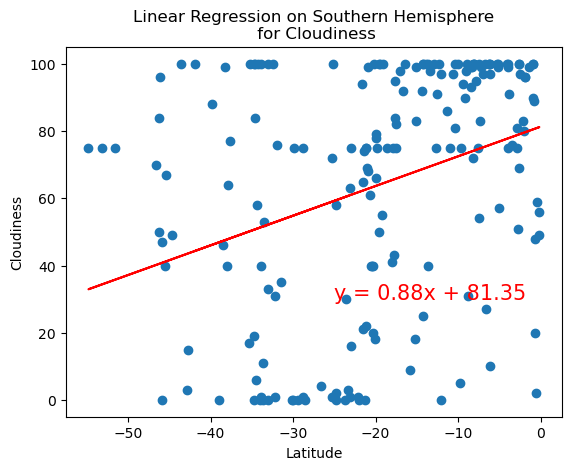

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function to create the linear regression line and plot
plot_linear_regression(x_values, y_values, 'Linear Regression on Southern Hemisphere\n for Cloudiness', 
                        'Latitude', 'Cloudiness', (-25,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05504985662354963


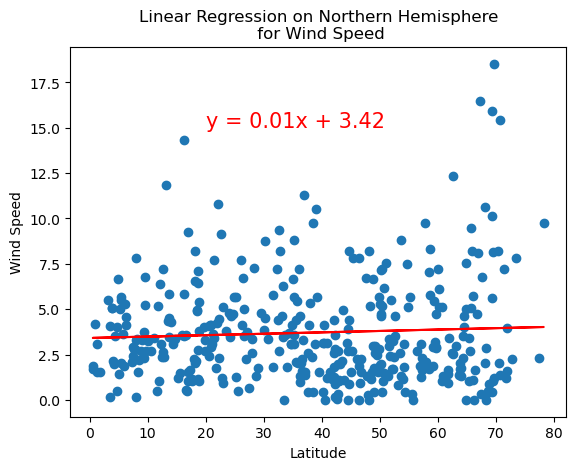

In [50]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function to create the linear regression line and plot
plot_linear_regression(x_values, y_values, 'Linear Regression on Northern Hemisphere\n for Wind Speed', 
                        'Latitude', 'Wind Speed', (20,15))

The r-value is: -0.2163415051721383


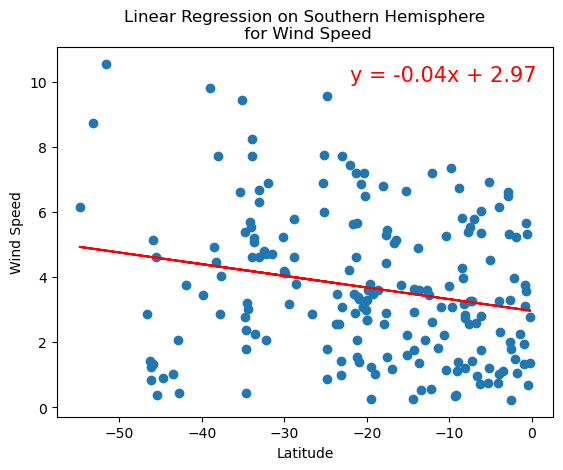

In [53]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function to create the linear regression line and plot
plot_linear_regression(x_values, y_values, 'Linear Regression on Southern Hemisphere\n for Wind Speed', 
                        'Latitude', 'Wind Speed', (-22,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE